## EXPLORATORY DATA ANALYSIS



In [2]:
import pandas as pd
import html
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from textblob import TextBlob
import datetime as dt

In [8]:
df = pd.read_csv(r'C:\Users\sowmy\Desktop\Technocolabs\Datasets\TwitterData\NVDA.csv')
df

,Datetime,Text
0,2021-09-21 18:07:35+00:00,#StockNews #NVDA Are You looking For Hot Stock...
1,2021-09-21 14:42:45+00:00,-$61 in 60 minutes | Small Account Trade Log \...
2,2021-09-21 12:25:19+00:00,Women did not get the vote by voting. They too...
3,2021-09-21 03:41:38+00:00,Who is buying the dip? Sold #SPY and #NVDA pu...
4,2021-09-21 02:59:32+00:00,$ES_F Daily\n\nDipped below the channel\n&amp;...
...,...,...
6478,2020-01-02 16:45:53+00:00,BLOCK TRADE detected in #NVDA
6479,2020-01-02 16:31:48+00:00,Last tuesday we entered $Nvda $Nivida #Nvda #N...
6480,2020-01-02 15:59:24+00:00,One week till I’m back in rehearsals with @Asa...
6481,2020-01-02 11:35:44+00:00,#Robinhood! Don't let 2020 Pass You Up! One St...


In [9]:
NVDA_clean = df.drop_duplicates('Text',keep='first') #delete the duplicates by dropping them and store the result value to a new variable
NVDA_clean.shape

(5950, 2)

In [10]:
NVDA_clean.Text = NVDA_clean.Text.str.lower() #convert text to lower case
NVDA_clean.Text = NVDA_clean.Text.apply(lambda x: re.split('https:\/\/.*', str(x))[0])  #remove urls
NVDA_clean.Text = NVDA_clean.Text.apply(lambda x: re.sub(r'@\w+', '', str(x)))   #remove mentions
NVDA_clean.Text = NVDA_clean.Text.apply(lambda x: re.sub(r'&[a-z]+;', '', str(x))) #remove html characters
NVDA_clean.Text = NVDA_clean.Text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
def getSubjectivity(NVDA_clean):
    return TextBlob(NVDA_clean).sentiment.subjectivity

def getPolarity(NVDA_clean):
    return TextBlob(NVDA_clean).sentiment.polarity

NVDA_clean['Subjectivity'] = NVDA_clean['Text'].apply(getSubjectivity)
NVDA_clean['Polarity'] = NVDA_clean['Text'].apply(getPolarity)

NVDA_clean

<ipython-input-11-666b68cec9f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_clean['Subjectivity'] = NVDA_clean['Text'].apply(getSubjectivity)
<ipython-input-11-666b68cec9f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_clean['Polarity'] = NVDA_clean['Text'].apply(getPolarity)


,Datetime,Text,Subjectivity,Polarity
0,2021-09-21 18:07:35+00:00,stocknews nvda are you looking for hot stock n...,0.520000,0.093333
1,2021-09-21 14:42:45+00:00,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857
2,2021-09-21 12:25:19+00:00,women did not get the vote by voting they took...,0.150000,-0.100000
3,2021-09-21 03:41:38+00:00,who is buying the dip sold spy and nvda put s...,0.500000,0.200000
4,2021-09-21 02:59:32+00:00,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190
...,...,...,...,...
6477,2020-01-03 16:47:53+00:00,classes at northern virginia dance academy res...,0.000000,0.000000
6479,2020-01-02 16:31:48+00:00,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000
6480,2020-01-02 15:59:24+00:00,one week till im back in rehearsals with look...,0.400000,0.150000
6481,2020-01-02 11:35:44+00:00,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000


In [6]:
NVDA_clean.to_csv('NVDA_polarity.csv', index=False)

In [12]:
def getTextAnalysis(a):
    if a<0:
        return "Negative"
    elif a==0:
        return "Neutral"
    else:
        return "Positive"    

In [13]:
NVDA_clean["Score"] = NVDA_clean['Polarity'].apply(getTextAnalysis)

<ipython-input-13-9e099aa9ae6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVDA_clean["Score"] = NVDA_clean['Polarity'].apply(getTextAnalysis)


In [37]:
NVDA_clean.Score.value_counts()

Positive    2742
Neutral     2423
Negative     785
Name: Score, dtype: int64

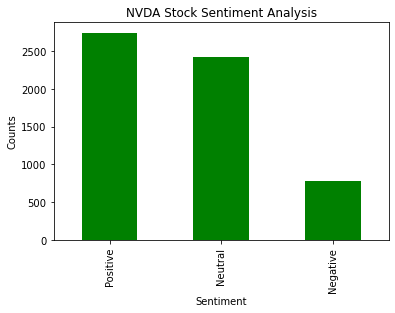

In [11]:
NVDA_clean['Score'].value_counts()

plt.title('NVDA Stock Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
NVDA_clean['Score'].value_counts().plot(kind = 'bar', color='green')
plt.show()


<ipython-input-115-21969e806b9e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  NVDA_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],


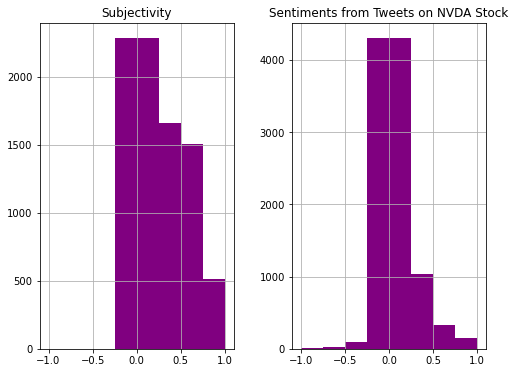

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
NVDA_clean.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on NVDA Stock")
plt.show()

In [14]:
segment = pd.get_dummies(NVDA_clean['Score'])
segment

,Negative,Neutral,Positive
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
6477,0,1,0
6479,0,1,0
6480,0,0,1
6481,0,0,1


In [50]:

#You can use lambda operator to apply your functions to the pandas data frame or to the series. More specifically if you want to convert each element on a column to a floating point number, you should do it like this:

segment['Negative']= segment['Negative'].apply(lambda x: float(x))
segment['Positive']=segment['Positive'].apply(lambda x: float(x))
segment['Neutral']=segment['Neutral'].apply(lambda x: float(x))


In [51]:
segment.dtypes

Negative    float64
Neutral     float64
Positive    float64
dtype: object

In [15]:
joined_df = pd.concat([NVDA_clean, segment], axis = 1)
joined_df

,Datetime,Text,Subjectivity,Polarity,Score,Negative,Neutral,Positive
0,2021-09-21 18:07:35+00:00,stocknews nvda are you looking for hot stock n...,0.520000,0.093333,Positive,0,0,1
1,2021-09-21 14:42:45+00:00,61 in 60 minutes small account trade log \nwh...,0.371429,0.017857,Positive,0,0,1
2,2021-09-21 12:25:19+00:00,women did not get the vote by voting they took...,0.150000,-0.100000,Negative,1,0,0
3,2021-09-21 03:41:38+00:00,who is buying the dip sold spy and nvda put s...,0.500000,0.200000,Positive,0,0,1
4,2021-09-21 02:59:32+00:00,es_f daily\n\ndipped below the channel\n\nboll...,0.195238,-0.026190,Negative,1,0,0
...,...,...,...,...,...,...,...,...
6477,2020-01-03 16:47:53+00:00,classes at northern virginia dance academy res...,0.000000,0.000000,Neutral,0,1,0
6479,2020-01-02 16:31:48+00:00,last tuesday we entered nvda nivida nvda nivid...,0.066667,0.000000,Neutral,0,1,0
6480,2020-01-02 15:59:24+00:00,one week till im back in rehearsals with look...,0.400000,0.150000,Positive,0,0,1
6481,2020-01-02 11:35:44+00:00,robinhood dont let 2020 pass you up one stock ...,0.800000,0.400000,Positive,0,0,1


In [16]:
joined_df['Datetime'] = pd.to_datetime(joined_df.Datetime, errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')

In [17]:
datetime_list = joined_df["Datetime"].tolist()
df1 = joined_df.groupby([joined_df['Datetime'].dt.date]).sum()
df1

,Subjectivity,Polarity,Negative,Neutral,Positive
Datetime,,,,,
2020-01-01,0.650000,0.416667,0,0,1
2020-01-02,1.266667,0.550000,0,1,2
2020-01-03,1.077778,0.816667,0,1,2
2020-01-04,0.300000,-0.500000,1,1,0
2020-01-05,1.825000,1.241667,0,0,3
...,...,...,...,...,...
2021-09-17,0.360000,-0.040000,1,2,0
2021-09-18,1.450000,0.416667,0,1,3
2021-09-19,0.077778,0.000000,0,3,0


In [18]:
#df2 = df1.drop(['Subjectivity','Polarity'],axis=1)
df1.reset_index(inplace=True)
df1

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive
0,2020-01-01,0.650000,0.416667,0,0,1
1,2020-01-02,1.266667,0.550000,0,1,2
2,2020-01-03,1.077778,0.816667,0,1,2
3,2020-01-04,0.300000,-0.500000,1,1,0
4,2020-01-05,1.825000,1.241667,0,0,3
...,...,...,...,...,...,...
622,2021-09-17,0.360000,-0.040000,1,2,0
623,2021-09-18,1.450000,0.416667,0,1,3
624,2021-09-19,0.077778,0.000000,0,3,0
625,2021-09-20,2.267407,1.044815,4,3,3


In [19]:
col_list = list(df1)
col_list.remove('Datetime')
df1['Total_Tweets'] = df1[col_list].sum(axis=1)

In [20]:
df1['Datetime']=pd.to_datetime(df1.Datetime, format='%Y/%m/%d %H:%M:%S.%f')
df1['Year'] = df1['Datetime'].dt.year
df1['Month'] = df1['Datetime'].dt.month
df1['Day'] = df1['Datetime'].dt.day

In [17]:
df1

,Datetime,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,2020-01-01,0.650000,0.416667,0,0,1,2.066667,2020,1,1
1,2020-01-02,1.266667,0.550000,0,1,2,4.816667,2020,1,2
2,2020-01-03,1.077778,0.816667,0,1,2,4.894444,2020,1,3
3,2020-01-04,0.300000,-0.500000,1,1,0,1.800000,2020,1,4
4,2020-01-05,1.825000,1.241667,0,0,3,6.066667,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
622,2021-09-17,0.360000,-0.040000,1,2,0,3.320000,2021,9,17
623,2021-09-18,1.450000,0.416667,0,1,3,5.866667,2021,9,18
624,2021-09-19,0.077778,0.000000,0,3,0,3.077778,2021,9,19
625,2021-09-20,2.267407,1.044815,4,3,3,13.312222,2021,9,20


In [53]:
df1.to_csv('EDA_NVD_Pol.csv', index=False)
df1

,Date,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,2020-01-01,0.650000,0.416667,0,0,1,2.066667,2020,1,1
1,2020-01-02,1.266667,0.550000,0,1,2,4.816667,2020,1,2
2,2020-01-03,1.077778,0.816667,0,1,2,4.894444,2020,1,3
3,2020-01-04,0.300000,-0.500000,1,1,0,1.800000,2020,1,4
4,2020-01-05,1.825000,1.241667,0,0,3,6.066667,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
622,2021-09-17,0.360000,-0.040000,1,2,0,3.320000,2021,9,17
623,2021-09-18,1.450000,0.416667,0,1,3,5.866667,2021,9,18
624,2021-09-19,0.077778,0.000000,0,3,0,3.077778,2021,9,19
625,2021-09-20,2.267407,1.044815,4,3,3,13.312222,2021,9,20


In [24]:
pwd

'C:\\Users\\sowmy\\Desktop\\Technocolabs\\Notebooks\\EDA_sentimentAnalysis'

In [21]:
df3 = pd.read_csv('NVDA.csv')


In [55]:
df3

,Date,Close/Last,Volume,Open,High,Low
0,09/21/2021,$212.46,20468810.0,$214.165,$214.25,$209.5
1,09/20/2021,$211.13,34944050.0,$211.46,$214.33,$206.62
2,09/17/2021,$219,29450280.0,$223,$223.21,$218.3
3,09/16/2021,$222.42,15603340.0,$221.835,$222.77,$219.27
4,09/15/2021,$223.41,16653800.0,$223.09,$223.6699,$219.66
...,...,...,...,...,...,...
1246,NaN,NaN,NaN,NaN,NaN,NaN
1247,NaN,NaN,NaN,NaN,NaN,NaN
1248,NaN,NaN,NaN,NaN,NaN,NaN
1249,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df3['Date'] = pd.to_datetime(df3['Date']).apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [23]:
df1.rename(columns = {'Datetime':'Date'}, inplace = True)
df1.Date

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
622   2021-09-17
623   2021-09-18
624   2021-09-19
625   2021-09-20
626   2021-09-21
Name: Date, Length: 627, dtype: datetime64[ns]

In [24]:
df3['Date'] = pd.to_datetime(df3.Date, errors='coerce',format='%Y/%m/%d')
df3.rename(columns = {'Close/Last':'Close'}, inplace = True)
df3

,Date,Close,Volume,Open,High,Low
0,2021-09-21,$212.46,20468810.0,$214.165,$214.25,$209.5
1,2021-09-20,$211.13,34944050.0,$211.46,$214.33,$206.62
2,2021-09-17,$219,29450280.0,$223,$223.21,$218.3
3,2021-09-16,$222.42,15603340.0,$221.835,$222.77,$219.27
4,2021-09-15,$223.41,16653800.0,$223.09,$223.6699,$219.66
...,...,...,...,...,...,...
1246,NaT,NaN,NaN,NaN,NaN,NaN
1247,NaT,NaN,NaN,NaN,NaN,NaN
1248,NaT,NaN,NaN,NaN,NaN,NaN
1249,NaT,NaN,NaN,NaN,NaN,NaN


In [59]:
df1

,Date,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day
0,2020-01-01,0.650000,0.416667,0,0,1,2.066667,2020,1,1
1,2020-01-02,1.266667,0.550000,0,1,2,4.816667,2020,1,2
2,2020-01-03,1.077778,0.816667,0,1,2,4.894444,2020,1,3
3,2020-01-04,0.300000,-0.500000,1,1,0,1.800000,2020,1,4
4,2020-01-05,1.825000,1.241667,0,0,3,6.066667,2020,1,5
...,...,...,...,...,...,...,...,...,...,...
622,2021-09-17,0.360000,-0.040000,1,2,0,3.320000,2021,9,17
623,2021-09-18,1.450000,0.416667,0,1,3,5.866667,2021,9,18
624,2021-09-19,0.077778,0.000000,0,3,0,3.077778,2021,9,19
625,2021-09-20,2.267407,1.044815,4,3,3,13.312222,2021,9,20


In [25]:
# Merge the two dataframes, using _ID column as key
merge_left = pd.merge(df1, df3, on = 'Date', how='left')
merge_left.set_index('Date', inplace = True)
# Write it to a new CSV file
#df3.to_csv('CSV3.csv')

In [28]:
merge_left.reset_index(inplace=True)
merge_left

,Date,Subjectivity,Polarity,Negative,Neutral,Positive,Total_Tweets,Year,Month,Day,Close,Volume,Open,High,Low
0,2020-01-01,0.650000,0.416667,0,0,1,2.066667,2020,1,1,nan,NaN,nan,nan,nan
1,2020-01-02,1.266667,0.550000,0,1,2,4.816667,2020,1,2,59.9775,23767876.0,59.6875,59.9775,59.18
2,2020-01-03,1.077778,0.816667,0,1,2,4.894444,2020,1,3,59.0175,20577232.0,58.775,59.4575,58.525
3,2020-01-04,0.300000,-0.500000,1,1,0,1.800000,2020,1,4,nan,NaN,nan,nan,nan
4,2020-01-05,1.825000,1.241667,0,0,3,6.066667,2020,1,5,nan,NaN,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,2021-09-17,0.360000,-0.040000,1,2,0,3.320000,2021,9,17,219,29450280.0,223,223.21,218.3
623,2021-09-18,1.450000,0.416667,0,1,3,5.866667,2021,9,18,nan,NaN,nan,nan,nan
624,2021-09-19,0.077778,0.000000,0,3,0,3.077778,2021,9,19,nan,NaN,nan,nan,nan
625,2021-09-20,2.267407,1.044815,4,3,3,13.312222,2021,9,20,211.13,34944050.0,211.46,214.33,206.62


In [29]:
merge_left['Close'] = merge_left['Close'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Open'] = merge_left['Open'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['Low'] = merge_left['Low'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['High'] = merge_left['High'].astype(str).map(lambda x: x.lstrip('$'))
merge_left['dayOfWeek'] = merge_left['Date'].dt.day_name()

In [30]:
merge_2 = merge_left.sort_index(ascending=True)
merge_2['Stock name']= 'NVDA'

In [31]:
colum_names = ['Stock name','Date','Year','Month','Day','dayOfWeek','Close','Open','High','Low','Volume','Subjectivity', 'Polarity','Positive','Negative','Neutral','Total_Tweets']
merge_3 = merge_2.reindex(columns=colum_names)
merge_3['Close'] = merge_3['Close'].astype(float)
merge_3['Open'] = merge_3['Open'].astype(float)
merge_3['High'] = merge_3['High'].astype(float)
merge_3['Low'] = merge_3['Low'].astype(float)
merge_4 = merge_3.interpolate(method = 'linear', limit_direction='backward')
merge_4

,Stock name,Date,Year,Month,Day,dayOfWeek,Close,Open,High,Low,Volume,Subjectivity,Polarity,Positive,Negative,Neutral,Total_Tweets
0,NVDA,2020-01-01,2020,1,1,Wednesday,59.977500,59.687500,59.977500,59.180000,2.376788e+07,0.650000,0.416667,1,0,0,2.066667
1,NVDA,2020-01-02,2020,1,2,Thursday,59.977500,59.687500,59.977500,59.180000,2.376788e+07,1.266667,0.550000,2,0,1,4.816667
2,NVDA,2020-01-03,2020,1,3,Friday,59.017500,58.775000,59.457500,58.525000,2.057723e+07,1.077778,0.816667,2,0,1,4.894444
3,NVDA,2020-01-04,2020,1,4,Saturday,59.100000,58.543333,59.410833,58.289167,2.248190e+07,0.300000,-0.500000,0,1,1,1.800000
4,NVDA,2020-01-05,2020,1,5,Sunday,59.182500,58.311667,59.364167,58.053333,2.438658e+07,1.825000,1.241667,3,0,0,6.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NVDA,2021-09-17,2021,9,17,Friday,219.000000,223.000000,223.210000,218.300000,2.945028e+07,0.360000,-0.040000,0,1,2,3.320000
623,NVDA,2021-09-18,2021,9,18,Saturday,216.376667,219.153333,220.250000,214.406667,3.128154e+07,1.450000,0.416667,3,0,1,5.866667
624,NVDA,2021-09-19,2021,9,19,Sunday,213.753333,215.306667,217.290000,210.513333,3.311279e+07,0.077778,0.000000,0,0,3,3.077778
625,NVDA,2021-09-20,2021,9,20,Monday,211.130000,211.460000,214.330000,206.620000,3.494405e+07,2.267407,1.044815,3,4,3,13.312222


In [32]:
merge_4.to_csv('NVDA_combined_POLy.csv')

In [70]:
pwd

'C:\\Users\\sowmy\\Desktop\\Technocolabs\\Notebooks\\EDA_sentimentAnalysis'

In [33]:
merge_4.dtypes

Stock name              object
Date            datetime64[ns]
Year                     int64
Month                    int64
Day                      int64
dayOfWeek               object
Close                  float64
Open                   float64
High                   float64
Low                    float64
Volume                 float64
Subjectivity           float64
Polarity               float64
Positive                 uint8
Negative                 uint8
Neutral                  uint8
Total_Tweets           float64
dtype: object